<span style="color:grey"> By Seongchan Kang </span>

<span style="color:grey"> Version : Python 3.10.1 in Window </span>

# 모델링(Modeling) 기법 선택

현재 올리지는 못했지만 올리고 싶었던 선택 알고리즘을 통해 모델링할 기법을 고름.

- 데이터가 글이나 시계열은 아님
- 범주를 예측함
- 데이터가 식별값을 가짐
- 그렇다면 분류에 해당함(로지스틱 회귀, 선형, 최근접, svm, 딥러닝, 의사결정 나무 등...)
- 2번째로는 의사결정 나무(Decsion Tree)를 실습하고자 함
- 로지스틱 회귀의 경우 이중분류라고 한다면, 의사결정 나무는 다중 분류라고 볼 수 있음. 두 가지의 결과를 비교하고자 함.

# 의사결정 나무란

아래로 뻗어나가는 가지만큼 과대 적합이나 과서 적합이 이루어질 수 있음

이를 유의하고 적절한 가지수를 정하는게 중요

아래 URL링크는 의사결정나무의 장단점 등을 잘 정리하는거 같아서 가져옴

<span>https://rk1993.tistory.com/entry/%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%ACDecision-Tree-%EC%89%BD%EA%B2%8C-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0</span>

# 의사결정나무 실습

## 라이브러리 및 파일 불러오기

1. 라이브러리 불러오기
2. 파일 불러오기
3. 파일 전처리 (이부분은 앞에서 완료)

In [30]:
# 기본 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 분할에 필요
from sklearn.model_selection import train_test_split

# 모델링에 필요한 라이브러리
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 평가를 위한 라이브러리 설치
from sklearn.metrics import confusion_matrix, classification_report # 정오분류표
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer, roc_curve, auc # 정확도, 민감도 등
from sklearn.model_selection import cross_val_score # Roc 관련

In [31]:
# 파일 불러오기
data = pd.read_csv("titanic_df.csv")
data = data.drop(labels = "Unnamed: 0", axis = 1)
data

,Sex,Embarked,ToH,Survived,Pclass,Age,Fare,Family
0,0,0,2,0,3,22,7.2500,0
1,1,1,3,1,1,38,71.2833,0
2,1,0,1,1,3,26,7.9250,0
3,1,0,3,1,1,35,53.1000,0
4,0,0,2,0,3,35,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,0,4,0,2,27,13.0000,0
887,1,0,1,1,1,19,30.0000,0
888,1,0,1,0,3,21,23.4500,1
889,0,1,2,1,1,26,30.0000,0


## 데이터 분할

In [32]:
# X, Y로 변수를 나누기(독립괴 종속 변수)
X = data[['Sex', 'Embarked', 'ToH', 'Pclass', 'Age', 'Fare', 'Family']]
Y = data['Survived']

# 훈련과 테스트로 변수 다시 한번더 나누기
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

## 모델링 및 모델 평가

1. 모델 만들기
2. 테스트 데이터로 예측
3. 모델 평가
4. 피드백 및 수정
5. 모델 평가

### 모델링

파라미터 설명
- min_samples_split
  > - 노드를 분할하기 위한 최소 샘플 데이터 개수 
  > - 디폴트 값 : 2

- min_samples_leaf
  > - 리프 노드가 되기 위한 최소 샘플 데이터 개수

- max_features
  > - 최적의 분할을 위해 고려할 최대 피처 개수
  > - None : 모든 피처 개수
  > - int : 사용할 피처 개수 설정
  > - float : 사용할 피처 개수를 퍼센트로 설정
  > - sqrt : 루트(전체 피처 개수)를 계산하여 설정
  > - auto : sqrt와 동일
  > - log  : log_2(전체 피처 개수)를 계산하여 설정

- max_depth
  > - 트리의 최대 깊이

- max_leaf_nodes
  > - 리프 노드에 들어가는 샘플 데이터의 최대 개수 

- random_state
  > - 실행 시마다 결과를 고정하고 싶다면 임의의 정수로 설정
  > - 근사 알고리즘의 초기 상태가 실행 시마다 달라질 수 있어서 초기값을 일정하게 고정시킴

In [33]:
# 모델링 #
dtree_model = DecisionTreeClassifier(random_state = 5)

# 모델 학습
dtree_model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=5)

In [34]:
# 현 하이퍼 파라미터
print("<현 모델의 하이퍼 파라미터>")
print(dtree_model.get_params())

<현 모델의 하이퍼 파라미터>
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 5, 'splitter': 'best'}


### 모델 평가

1. 테스트 데이터로 예측
2. 모델 평가 지표들로 평가
 - 정확도(accuracy) : 전체 샘플 중 맞게 예측한 샘플 수의 비율
 - 정밀도(precision) : 양성 클래스에 속한다고 출력한 샘플 중 실제로 양성 클래스에 속하는 샘플 수의 비율
 - 재현율(recall) : 실제 양성 클래스에 속한 표본 중에 양성 클래스에 속한다고 출력한 표본의 수의 비율 (= 민감도)
 - F-score : 정밀도와 재현율의 가중조화평균 (정밀도에 주어지는 가중치인 베타가 1인 경우 => F1-score)
 - ROC 곡선 : 클래스 판별 기준값의 변화에 따른 위양성률(fall-out)과 재현율(recall)의 변화를 시각화
   - AUC(Area Under the Curve)는 ROC curve의 면적

3. 평가를 보면 학습 데이터에 대한 평가가 매우 좋음, 평가 데이터는 로지스틱에 비해 평가가 떨어지긴함
4. 하지만 DecisionTree는 다중 분류에서도 쓰이기 때문에 이것 하나로 단순히 좋고 안좋고를 판단하기엔 무리가 있음

In [35]:
# 테스트 데이터로 예측 #
y_pred = dtree_model.predict(X_test)

In [36]:
# 정오분포표 #
ac_pd = pd.DataFrame(confusion_matrix(Y_test, y_pred), index = ["Real_True", "Real_False"], columns = ["True_Predict", "False_Predict"])
ac_pd

,True_Predict,False_Predict
Real_True,138,23
Real_False,27,80


In [37]:
# 데이터 셋 평가 비교 #
print("데이터 셋 평가 비교 ")
print("Train Set Score : {}".format(dtree_model.score(X_train, Y_train)))
print("Test  Set Score : {}".format(dtree_model.score(X_test, Y_test)))

데이터 셋 평가 비교 
Train Set Score : 0.9823434991974318
Test  Set Score : 0.8134328358208955


In [38]:
# 모델 학습 성능 비교

## accuracy: 정확도. 전체 학습데이터의 개수에서 각 클래스에서 자신의 클래스를 정확하게 맞춘 개수의 비율.
## macro : 단순평균
## weighted : 각 클래스에 속하는 표본의 갯수로 가중평균

print("Classification_Report")
print(classification_report(Y_test, y_pred))

Classification_Report
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       161
           1       0.78      0.75      0.76       107

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [39]:
# 직접 확인 
print("< Desicion Tree >")
print("잘못 분류된 샘플 수 : {}".format((y_pred != Y_test).sum()))
print("정확도(Accuracy) : {}".format(accuracy_score(Y_test, y_pred)))
print("정밀도(Precision) : {}".format(precision_score(y_true = Y_test, y_pred = y_pred)))
print("재현율(Recall) : {}".format(recall_score(y_true = Y_test, y_pred = y_pred)))
print("F1_Score : {}".format(f1_score(y_true = Y_test, y_pred = y_pred)))

< Desicion Tree >
잘못 분류된 샘플 수 : 50
정확도(Accuracy) : 0.8134328358208955
정밀도(Precision) : 0.7766990291262136
재현율(Recall) : 0.7476635514018691
F1_Score : 0.7619047619047619


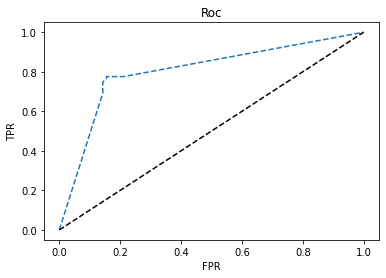

In [40]:
# Roc 곡선을 위한 변수 생성 #
fpr, tpr, thresholds = roc_curve(Y_test, dtree_model.predict_proba(X_test)[:, 1])

# Roc 곡선 #
plt.plot(fpr, tpr, "--")
plt.plot([0, 1], [0, 1], "k--")
plt.plot([fpr], [tpr], "r-", ms = 10)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc")
plt.show()

## 그리드서치(GridSearchCV)

적절한 매개변수를 찾기위해 여러가지 매개변수를 넣어보고 돌려보는 등의 작업이 이루어짐 => 모델의 최적화 작업

이러한 최적화 작업을 편하게 만들어 줌

1. 모델링을 위한 준비
2. 모델링
3. 학습
4. 평가

### 모델링을 위한 준비

원래 모델 함수에 어떠한 매개변수가 있는지 파악할 필요가 있음

In [41]:
# 돌려볼 매개변수 미리 선언
params = {"max_depth" : [3, 4, 5, 6, 7]}

### 모델링

GridSearchCV 로 다시 모델링 설계

In [42]:
# 그리드 서치로 모델링
## GridSearchCV(모델명, param_grid = 미리 선언한 매개변수, scoring = "확인할 평가지표", cv = 교차 검증에서 몇개로 분할되는지 지정, return_train_score = True)
grid_model = GridSearchCV(dtree_model, param_grid = params, scoring = "accuracy", cv = 5, return_train_score = True)

# 학습
grid_model.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=5),
             param_grid={'max_depth': [3, 4, 5, 6, 7]}, return_train_score=True,
             scoring='accuracy')

### 최적화 평가

In [43]:
# 데이터 프레임으로 결과 확인
grid_result_df = pd.DataFrame(grid_model.cv_results_)

# 필요한 칼럼만 가져와서 보기
grid_result_df[["param_max_depth", "mean_fit_time", "mean_train_score", "mean_test_score", "rank_test_score"]]

## 확인하면 아래에 정확도가 올라간 것을 확인할 수 있음

,param_max_depth,mean_fit_time,mean_train_score,mean_test_score,rank_test_score
0,3,0.004932,0.837482,0.812206,2
1,4,0.005398,0.847113,0.812245,1
2,5,0.007465,0.859551,0.802555,3
3,6,0.008247,0.877610,0.792968,4
4,7,0.005196,0.892055,0.783265,5


### 그리드 서치 실습 2

In [44]:
# 돌려볼 매개변수 미리 선언
params = {
  "max_depth" : [3, 4, 5, 6, 7],
  "min_samples_split" : [8, 16, 24]
  }

In [45]:
# 그리드 서치로 모델링
grid_cv = GridSearchCV(dtree_model, param_grid = params, scoring = "accuracy", cv = 5, return_train_score = True)

# 적합(=학습)
grid_cv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=5),
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_split': [8, 16, 24]},
             return_train_score=True, scoring='accuracy')

In [46]:
# 데이터 프레임으로 받음
grid_result_df = pd.DataFrame(grid_cv.cv_results_)

# 필요한 칼럼만 가져와서 보기
grid_result_df[["param_max_depth", "param_min_samples_split", "mean_fit_time", "mean_train_score", "mean_test_score", "rank_test_score"]]

## 하이퍼파라미터를 여러가지 설정하여 아래와 같은 결과를 가져올 수 잇음

,param_max_depth,param_min_samples_split,mean_fit_time,mean_train_score,mean_test_score,rank_test_score
0,3,8,0.005593,0.836679,0.812206,3
1,3,16,0.005398,0.834675,0.810594,4
2,3,24,0.006408,0.830659,0.804194,6
3,4,8,0.004997,0.845909,0.812245,1
4,4,16,0.004599,0.841897,0.812245,2
5,4,24,0.003865,0.837078,0.805845,5
6,5,8,0.007696,0.855538,0.800968,7
7,5,16,0.004629,0.850322,0.797768,8
8,5,24,0.004865,0.844299,0.792981,9
9,6,8,0.004336,0.869181,0.791329,10


### 베스트 모델 가져오기

In [47]:
# 우선 그리드서치의 베스트 모델을 가져오기
best_dt_model = grid_cv.best_estimator_
best_dt_predict = best_dt_model.predict(X_test)
best_accuracy = accuracy_score(Y_test, best_dt_predict)

print("Best Decision Tree Accuracy", best_accuracy)

Best Decision Tree Accuracy 0.8395522388059702


### 베스트 모델 평가

In [48]:
# 직접 확인 
print("< Best Desicion Tree >")
print("잘못 분류된 샘플 수 : {}".format((best_dt_predict != Y_test).sum()))
print("정확도(Accuracy) : {}".format(accuracy_score(Y_test, best_dt_predict)))
print("정밀도(Precision) : {}".format(precision_score(y_true = Y_test, y_pred = best_dt_predict)))
print("재현율(Recall) : {}".format(recall_score(y_true = Y_test, y_pred = best_dt_predict)))
print("F1_Score : {}".format(f1_score(y_true = Y_test, y_pred = best_dt_predict)))

< Best Desicion Tree >
잘못 분류된 샘플 수 : 43
정확도(Accuracy) : 0.8395522388059702
정밀도(Precision) : 0.826530612244898
재현율(Recall) : 0.7570093457943925
F1_Score : 0.7902439024390243


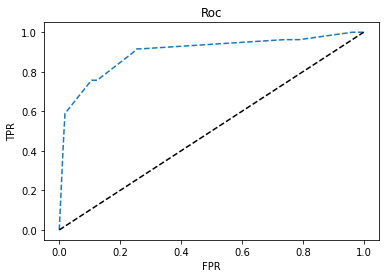

In [49]:
# Roc 곡선을 위한 변수 생성 #
fpr, tpr, thresholds = roc_curve(Y_test, best_dt_model.predict_proba(X_test)[:, 1])

# Roc 곡선 #
plt.plot(fpr, tpr, "--")
plt.plot([0, 1], [0, 1], "k--")
plt.plot([fpr], [tpr], "r-", ms = 10)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("Roc")
plt.show()

In [50]:
# Roc 곡선의 Auc 값 계산 #
auc_score = cross_val_score(estimator = best_dt_model, X = X_train, y = Y_train, cv = 5, scoring = "roc_auc")

print("[ Best Desicion Tree ] Roc_Auc : {} (+/- {})".format(auc_score.mean(), auc_score.std()))

[ Best Desicion Tree ] Roc_Auc : 0.816858673241652 (+/- 0.03140680276095954)


## 시각화

### 변수의 중요도 시각화

In [51]:
# 라이브러리 불러오기
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
# 베스트 모델의 변수의 중요도 뽑아오기
feature_importance = best_dt_model.feature_importances_

# 시리즈로 정리
feature_importance_value = pd.Series(feature_importance, index = X_train.columns)

# 내림차순으로 정리
feature_top_5 = feature_importance_value.sort_values(ascending = False)

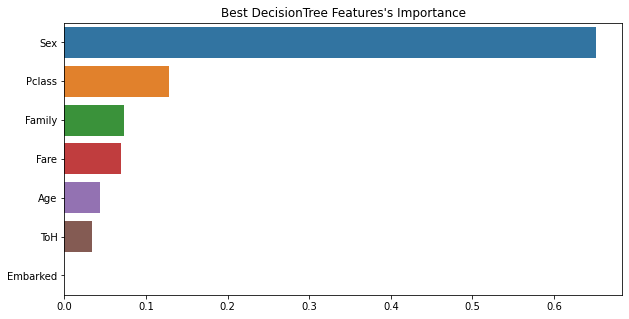

In [53]:
# 시각화
plt.figure(figsize = (10,5))
plt.title("Best DecisionTree Features's Importance")
sns.barplot(x = feature_top_5, y = feature_top_5.index)
plt.show()

### 트리모양 시각화

- 여기서 사용하는 Graphviz를 사용하기 위해서는 사전 작업이 필요
  > 1. <span>https://www2.graphviz.org/Packages/stable/windows/10/cmake/Release/x64/</span> 의 링크로 들어가서 설치(환경변수도 같이 설정)
  > 2. 설치하면서 환경변수를 설정하지 못했다면 아래의 코드처럼 환경 변수 설정
  > 3. 코드말고 직접하는 방법은 검색으로 환경변수 검색. Path에 편집 새로 만들기 "C:\Program Files\Graphviz 2.44.1\bin"를 추가
  > 4. pip 로 설치 후 다시 라이브러리 불러오기


- 참고 문서 : <span>https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html?highlight=export_graphviz</span>


- 파라미터
  > - out_file : 파일 이름
  > - class_names : 정답데이터 넣어주기
  > - feature_names : 컬럼명 넣거주기
  > - filled : True로 색깔을 넣어줌
  > - rotate : True일 경우, 트리가 옆으로 뻗음


- 가끔 환경변수를 설정해도 코드가 안돌아가는 경우도 존재
  > 이럴 경우는 VSCode에서 확장자를 설치하여 저장한 dot 파일을 Preview 형태로 볼 수 있음

In [54]:
# import os #

# os.environ["PATH"] += os.pathsep + "C:/Program Files/Graphviz pip install graphviz 2.44.1/bin" #

# %pip install graphviz #

In [55]:
#import graphviz
#from sklearn.tree import export_graphviz

# out_file로 지정된 tree.dot 파일 생성
#export_graphviz(best_dt_model, out_file = "tree.dot")

In [56]:
# 이 코드가 안먹힐 경우 위에 안 먹힐 경우 대처방안 참고
#with open("tree.dot") as f :
#    dot_graph = f.read()
#
#graphviz.Source(dot_graph)

SyntaxError: invalid decimal literal (2489680295.py, line 2)